<a href="https://colab.research.google.com/github/linyu3294/cs6220-data-minning-hw/blob/main/cs6220_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---
## **LOAD DATA (FOR REFERENCES): MNIST, FASHION, SPAMBASE, 20NG**


https://en.wikipedia.org/wiki/MNIST_database

http://yann.lecun.com/exdb/mnist/

https://www.kaggle.com/zalando-research/fashionmnist


**Load MNIST**

In [ ]:
from keras.datasets import mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

# reshape and normalize
mnist_train = np.reshape(mnist_train, (60000, 784)) 
mnist_train = normalize(mnist_train, norm ='max')
mnist_test = np.reshape(mnist_test, (10000, 784))
mnist_test = normalize(mnist_test, norm ='max') 

11493376/11490434 [==============================] - 0s 0us/step


**Load FASHION**

In [ ]:
from keras.datasets import fashion_mnist 
import numpy as np
from sklearn.preprocessing import normalize

# load mnist data
(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = fashion_mnist.load_data()

# reshape and normalize
fashion_train = np.reshape(fashion_train, (60000, 784)) 
fashion_train = normalize(fashion_train, norm ='max')
fashion_test = np.reshape(fashion_test, (10000, 784))
fashion_test = normalize(fashion_test, norm ='max') 

4423680/4422102 [==============================] - 0s 0us/step


**Load 20NG**

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train)).todense()
ng_test = csr_matrix(vectorizer.transform(ng_test)).todense()

**Load SPAMBASE**

In [ ]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)


---
## **PROBLEM 1: Setup Tensor Flow, run few demos**

Install conda virtual environment (optional)
Please follow the instruction in the link below:

https://conda.io/projects/conda/en/latest/user-guide/install/index.html

After you successfully install conda, you can create an environment:

```
conda create --name mynev
```
```
conda activate myenv
```
```
pip install tensorflow
```

```
>>> python 
>>> import tensorflow as tf
>>> print(tf.__version__)
```



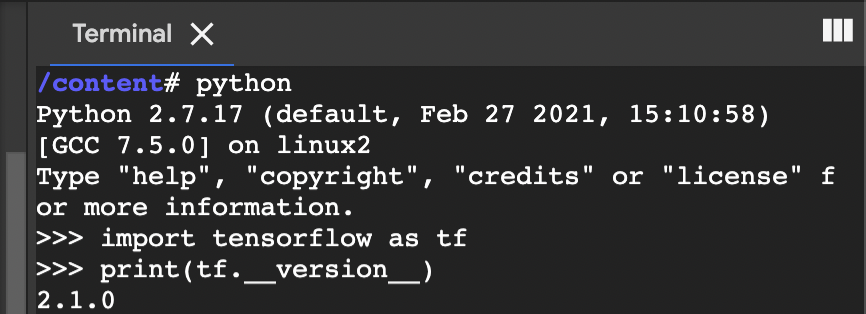

---
## **PROBLEM 2 : NNet supervised classification**


---
### **Section A**

For MNIST dataset, run a TF in supervised mode (train/test) and report results


In [ ]:
from keras.datasets import mnist 
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

MNIST Model Representation

In [ ]:
import tensorflow as tf
import numpy as np


def preprocess (x, y) :
  x = tf.cast(x, tf.float32) / 255.0
  y = tf.cast(y, tf.int64) 
  return x,y

def init_data (xs, ys, n_classes = 10) :
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .map(preprocess)             \
    .shuffle(len(ys))  \
    .batch(128)

tf_mnist_train = init_data(mnist_train, mnist_train_labels)
tf_mnist_validation = init_data(mnist_test, mnist_test_labels)

print (tf_mnist_train)


<BatchDataset shapes: ((None, 28, 28), (None,)), types: (tf.float32, tf.int64)>


MNIST Model Hypothesis

In [ ]:
import keras

mnist_model = keras.Sequential([
  keras.layers.Reshape( target_shape = (28 * 28,) , input_shape= (28, 28) ), 
  keras.layers.Dense(units = 256, activation = 'relu'),
  keras.layers.Dense(units = 10, activation = 'softmax')
])


MNIST Model Training

In [ ]:
mnist_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

mnist_model.fit(
    tf_mnist_train,
    epochs=6,
    validation_data=tf_mnist_validation,
)

Epoch 1/6
469/469 [==============================] - 14s 12ms/step - loss: 0.5431 - sparse_categorical_accuracy: 0.8516 - val_loss: 0.1550 - val_sparse_categorical_accuracy: 0.9541
Epoch 2/6
469/469 [==============================] - 13s 12ms/step - loss: 0.1424 - sparse_categorical_accuracy: 0.9594 - val_loss: 0.1147 - val_sparse_categorical_accuracy: 0.9647
Epoch 3/6
469/469 [==============================] - 14s 12ms/step - loss: 0.0896 - sparse_categorical_accuracy: 0.9744 - val_loss: 0.0927 - val_sparse_categorical_accuracy: 0.9711
Epoch 4/6
469/469 [==============================] - 15s 13ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9815 - val_loss: 0.0782 - val_sparse_categorical_accuracy: 0.9776
Epoch 5/6
469/469 [==============================] - 16s 12ms/step - loss: 0.0489 - sparse_categorical_accuracy: 0.9865 - val_loss: 0.0730 - val_sparse_categorical_accuracy: 0.9768
Epoch 6/6
469/469 [==============================] - 14s 12ms/step - loss: 0.0394 - sparse_cate

In [ ]:
predictions = mnist_model.predict(mnist_test)
for i in range(10):
  print("prediction : ", np.argmax(predictions[i]), "  |  ", "actual label  : ", mnist_test_labels[i])

prediction :  7   |   actual label  :  7
prediction :  2   |   actual label  :  2
prediction :  1   |   actual label  :  1
prediction :  0   |   actual label  :  0
prediction :  7   |   actual label  :  4
prediction :  1   |   actual label  :  1
prediction :  7   |   actual label  :  4
prediction :  7   |   actual label  :  9
prediction :  3   |   actual label  :  5
prediction :  7   |   actual label  :  9


MNIST Predicting Test Data

---
### **Section B**

TF classification for 20NG


In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

print (ng_train.shape)

(11314, 130107)


In [ ]:
import tensorflow as tf
import numpy as np

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


def init_data (xs, ys, n_classes = 20) :
  xs = convert_sparse_matrix_to_sparse_tensor(xs)
  xs = tf.sparse.reorder(xs)
  # ys is not dense and does not need conversion
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .shuffle(len(ys))  \
    .batch(2)

tf_ng_train = init_data(ng_train, ng_train_labels)
tf_ng_validation = init_data(ng_test, ng_test_labels)


aaaa
aaaa


In [ ]:
import keras

ng_model = keras.Sequential([
  keras.layers.Dense(units = 36, activation = 'relu'),
  keras.layers.Dense(units = 20, activation = 'softmax'),
])


In [ ]:
ng_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)
 
ng_model.fit(
    tf_ng_train,
    epochs=1,
    batch_size = 2,
    validation_data=tf_ng_validation,
)

Epoch 1/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.1361 - sparse_categorical_accuracy: 0.9791 - val_loss: 0.5184 - val_sparse_categorical_accuracy: 0.8579
Epoch 2/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0219 - sparse_categorical_accuracy: 0.9970 - val_loss: 0.5194 - val_sparse_categorical_accuracy: 0.8516
Epoch 3/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0059 - sparse_categorical_accuracy: 0.9988 - val_loss: 0.5479 - val_sparse_categorical_accuracy: 0.8516
Epoch 4/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0037 - sparse_categorical_accuracy: 0.9990 - val_loss: 0.5948 - val_sparse_categorical_accuracy: 0.8517
Epoch 5/10
5657/5657 [==============================] - 57s 10ms/step - loss: 0.0043 - sparse_categorical_accuracy: 0.9987 - val_loss: 0.6547 - val_sparse_categorical_accuracy: 0.8437
Epoch 6/10
5657/5657 [==============================] - 56s 10ms/step - loss: 0.

In [ ]:
ng_test = convert_sparse_matrix_to_sparse_tensor(ng_test)
ng_test = tf.sparse.reorder(ng_test)
predictions = ng_model.predict(ng_test)

for i in range(20):
  print("prediction : ", np.argmax(predictions[i]), "  |  ", "actual label  : ", ng_test_labels[i])

prediction :  3   |   actual label  :  7
prediction :  1   |   actual label  :  5
prediction :  0   |   actual label  :  0
prediction :  17   |   actual label  :  17
prediction :  0   |   actual label  :  19
prediction :  13   |   actual label  :  13
prediction :  15   |   actual label  :  15
prediction :  2   |   actual label  :  15
prediction :  5   |   actual label  :  5
prediction :  1   |   actual label  :  1
prediction :  2   |   actual label  :  2
prediction :  5   |   actual label  :  5
prediction :  17   |   actual label  :  17
prediction :  8   |   actual label  :  8
prediction :  15   |   actual label  :  0
prediction :  3   |   actual label  :  2
prediction :  2   |   actual label  :  4
prediction :  1   |   actual label  :  1
prediction :  12   |   actual label  :  6
prediction :  16   |   actual label  :  16


---
### **Section C**

Extra Credit. Run TF classification for MNIST using an Nvidia GPU



---
## **PROBLEM 3 : Autoencoders**
For each one of the datasets MNIST, 20NG, SPAMBASE, FASHION, run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?). 

Verify the obtained re-encoding of data (the new feature representation) in several ways:

*   repeat a classification train/test task , or a clustering task
*   examine the new pairwise distances dist(i,j) agains the old distances obtained with original features (sample 100 pairs of related words)
*   examine the top 20 neighbours (by new distance) set overlap with old neighbours, per datapoint
*  for images, rebuild the image form output layer and draw to look at it

https://www.youtube.com/watch?v=3jmcHZq3A5s



---
### **Section A : MNIST**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 15  # number of nodes in the hidden encoded layer

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess MNIST data

In [ ]:
from keras.datasets import mnist
import numpy as np
(mnist_train, mnist_train_labels), (mnist_test, mnist_test_labels) = mnist.load_data()

mnist_train = mnist_train.astype('float32') / 255.
mnist_test = mnist_test.astype('float32') / 255.
mnist_train = mnist_train.reshape((len(mnist_train), np.prod(mnist_train.shape[1:])))
mnist_test = mnist_test.reshape((len(mnist_test), np.prod(mnist_test.shape[1:])))
print(mnist_train.shape)
print(mnist_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(mnist_train, mnist_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(mnist_test, mnist_test)
                )

Epoch 1/10
235/235 [==============================] - 3s 9ms/step - loss: 0.4169 - val_loss: 0.2229
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.2123 - val_loss: 0.1861
Epoch 3/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1820 - val_loss: 0.1670
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1653 - val_loss: 0.1557
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1549 - val_loss: 0.1488
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1495 - val_loss: 0.1455
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1464 - val_loss: 0.1432
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1441 - val_loss: 0.1415
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1423 - val_loss: 0.1400
Epoch 10/10
235/235 [==============================] - 2s 7ms/step - loss: 0.1410 - val_loss: 0.1385

---
Using encoder and decoder to predict test images

In [ ]:
encoded_train_imgs = encoder.predict(mnist_train)
encoded_test_imgs = encoder.predict(mnist_test)
decoded_imgs = decoder.predict(encoded_test_imgs)

# Hidden/ Reduced Features
print(encoded_test_imgs.shape)

(10000, 15)


Repeat a classification train/test task , or a clustering task

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

l=lr(solver='lbfgs', max_iter=100000).fit(encoded_train_imgs, mnist_train_labels)
results = l.predict(encoded_test_imgs)

cm = confusion_matrix(mnist_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(encoded_test_imgs, mnist_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')


NameError: ignored

Create visuals to evaluate prediction results
Top Row is the original 

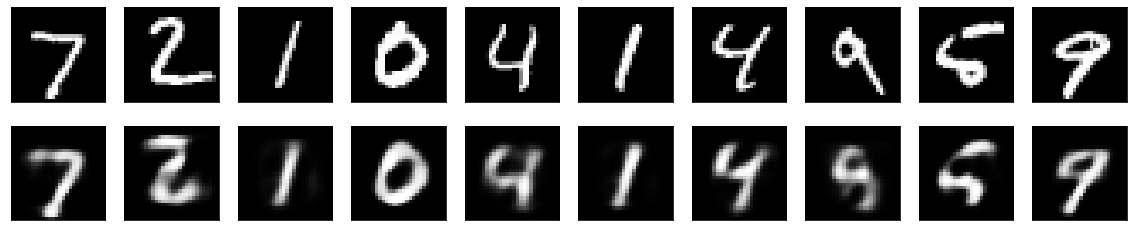

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(mnist_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as dist
import numpy as np


for i in range(100):
  prediction = list(decoded_imgs)[i].reshape(1, -1)
  test = mnist_test[i].reshape(1, -1)
  print(dist(prediction, test))


[[0.9022747]]
[[0.8075267]]
[[0.8759545]]
[[0.9576467]]
[[0.81634057]]
[[0.94659764]]
[[0.82929456]]
[[0.74881685]]
[[0.84654915]]
[[0.92681164]]
[[0.90871274]]
[[0.8371599]]
[[0.9219985]]
[[0.8998782]]
[[0.9530739]]
[[0.7403982]]
[[0.8825524]]
[[0.90787864]]
[[0.82132536]]
[[0.8460957]]
[[0.9380452]]
[[0.86527395]]
[[0.81619316]]
[[0.8353159]]
[[0.76218975]]
[[0.9208603]]
[[0.8248565]]
[[0.8681973]]
[[0.9309087]]
[[0.83980757]]
[[0.91655636]]
[[0.83166873]]
[[0.9293365]]
[[0.77594364]]
[[0.9284847]]
[[0.8149964]]
[[0.83295405]]
[[0.9257206]]
[[0.7568699]]
[[0.96077275]]
[[0.78124654]]
[[0.8188584]]
[[0.9406216]]
[[0.6600517]]
[[0.88922817]]
[[0.8386548]]
[[0.86815786]]
[[0.68142414]]
[[0.9587771]]
[[0.83561856]]
[[0.8666434]]
[[0.88288766]]
[[0.8101171]]
[[0.740434]]
[[0.758656]]
[[0.88874066]]
[[0.9187426]]
[[0.88374615]]
[[0.92925036]]
[[0.72500324]]
[[0.88818496]]
[[0.83962816]]
[[0.7733458]]
[[0.86119145]]
[[0.8652023]]
[[0.81851447]]
[[0.8051628]]
[[0.87410194]]
[[0.95715606]]
[[

In [ ]:
x_test_encoded = encoder.predict(mnist_test, batch_size=32)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=mnist_test_labels,  cmap=plt.cm.jet)
plt.show()

When k is small, the hidden encoded layer is small. A lot of information loss occurs when trying to reconstruct the original image from a small hidden enocded layer. Therefore the model fails to learn correctly. When k is a large number, the hidden encoded layer is big. A large percentage of the information is retained and encoding occurs without the pushing through a bottle neck. Therefore the model fails to learn anything meaningful.

---
### **Section B : FASHION**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 50  # number of nodes in the hidden encoded layer

# This is our input image
input_img = keras.Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(784, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess FASHION data

In [ ]:
from keras.datasets import fashion_mnist
import numpy as np
(fashion_train, fashion_train_labels), (fashion_test, fashion_test_labels) = fashion_mnist.load_data()

fashion_train = fashion_train.astype('float32') / 255.
fashion_test = fashion_test.astype('float32') / 255.
fashion_train = fashion_train.reshape((len(fashion_train), np.prod(fashion_train.shape[1:])))
fashion_test = fashion_test.reshape((len(fashion_test), np.prod(fashion_test.shape[1:])))
print(fashion_train.shape)
print(fashion_test.shape)

(60000, 784)
(10000, 784)


Train Model

In [ ]:
autoencoder.fit(fashion_train, fashion_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(fashion_test, fashion_test))

Epoch 1/10
235/235 [==============================] - 4s 16ms/step - loss: 0.4846 - val_loss: 0.3341
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3257 - val_loss: 0.3128
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3071 - val_loss: 0.3008
Epoch 4/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2962 - val_loss: 0.2934
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.2906 - val_loss: 0.2890
Epoch 6/10
235/235 [==============================] - 3s 15ms/step - loss: 0.2863 - val_loss: 0.2858
Epoch 7/10
235/235 [==============================] - 4s 15ms/step - loss: 0.2833 - val_loss: 0.2836
Epoch 8/10
235/235 [==============================] - 3s 15ms/step - loss: 0.2816 - val_loss: 0.2823
Epoch 9/10
235/235 [==============================] - 3s 15ms/step - loss: 0.2796 - val_loss: 0.2813
Epoch 10/10
235/235 [==============================] - 3s 15ms/step - loss: 0.2790 - val_lo

Using encoder and decoder to predict test images

In [ ]:
encoded_train_imgs = encoder.predict(fashion_train)
encoded_test_imgs = encoder.predict(fashion_test)
decoded_imgs = decoder.predict(encoded_test_imgs)

repeat a classification train/test task , or a clustering task

In [ ]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix

l=lr(solver='lbfgs', max_iter=100000).fit(encoded_train_imgs[:3000], fashion_train_labels[:3000])
results = l.predict(encoded_test_imgs)

cm = confusion_matrix(fashion_test_labels, results)
print('Confusion Matrix\n', '\n', cm, '\n')
score = l.score(encoded_test_imgs, fashion_test_labels)
print("Accuracy of Logistic Prediction : ", score , '\n')


Confusion Matrix
 
 [[760   8  28  54   6   4 128   1  11   0]
 [  4 943   5  34   6   0   7   0   1   0]
 [ 13   5 693   9 142   0 127   0  10   1]
 [ 43  23  19 831  33   2  44   0   5   0]
 [  3   3 117  42 715   1 113   0   6   0]
 [  1   1   1   0   0 875   0  65   7  50]
 [132   8 125  48 132   0 526   0  29   0]
 [  0   0   0   0   0  50   0 894   2  54]
 [  7   3   8   4   6  12  37  10 911   2]
 [  0   0   0   0   0  17   1  53   3 926]] 

Accuracy of Logistic Prediction :  0.8074 



Create visuals to evaluate prediction results
Top Row is the original 

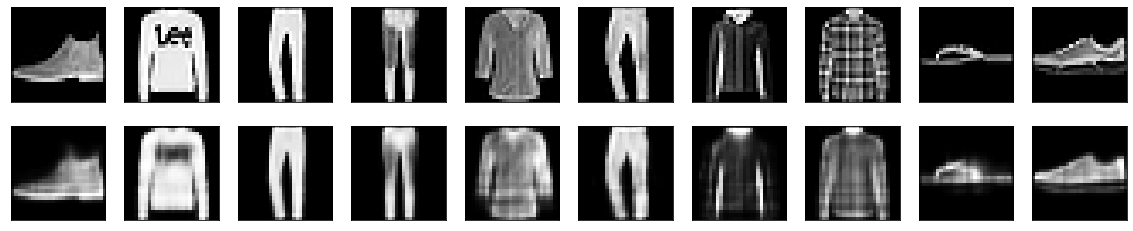

In [ ]:
# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(fashion_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

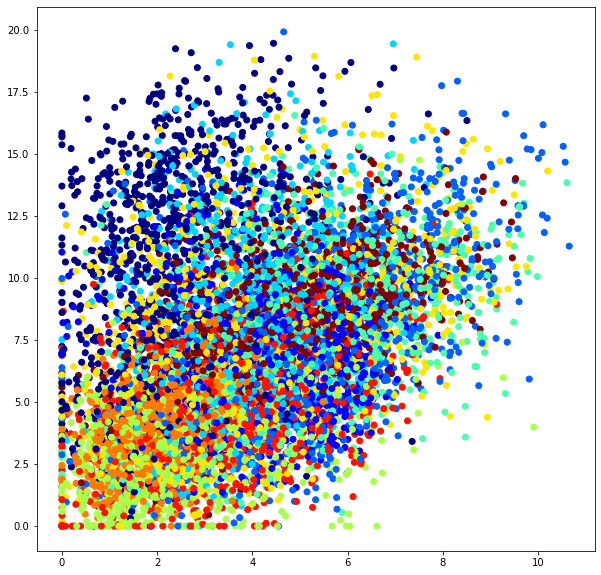

In [ ]:
x_test_encoded = encoder.predict(fashion_test, batch_size=256)
plt.figure(figsize=(10, 10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=fashion_test_labels,  cmap=plt.cm.jet)
plt.show()

When k is small, the hidden encoded layer is small. A lot of information loss occurs when trying to reconstruct the original image from a small hidden enocded layer. Therefore the model fails to learn correctly. When k is a large number, the hidden encoded layer is big. A large percentage of the information is retained and encoding occurs without the pushing through a bottle neck. Therefore the model fails to learn anything meaningful.

---
### **Section C : SPAMBASE**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 3  # number of nodes in the hidden encoded layer

# This is our input data point - each spam has 57 features
input_img = keras.Input(shape=(57,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(57, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input_img, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

Import and preprocess SPAM data

In [ ]:
import numpy as np

def parse_data (infile, num_features) -> np.array :
  max_news_index = 0;

  infile = open(infile, "r")
  all_data = infile.read()
  lines = all_data.splitlines()

  X = []
  X_target = []
  for line in lines:
    if line:
      datapoint_vector = []
      for f in range(num_features):
        val = line.split(',')[f]
        if (' ' in val):continue
        else:
          float_val = float(val)
          datapoint_vector.append(float_val)
      datapoint_vector.append(float(line.strip()[-1:]))
      X.append(datapoint_vector)

  return np.array(X)

spam_data = parse_data("/content/drive/MyDrive/NEU ALIGN CS Masters/CS6220 Data Mining/Colab Notebooks/spambase.data", 57)
spam_train = spam_data[ :4000 ,:-1]
spam_train_labels = spam_data[ :4000 , -1:]
spam_test = spam_data[ 4000: ,:-1]
spam_test_labels = spam_data[ 4000: ,:-1]

print(spam_train.shape)
print(spam_test.shape)


(4000, 57)
(601, 57)


In [ ]:
autoencoder.fit(spam_train, spam_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(spam_test, spam_test))

Epoch 1/10
16/16 [==============================] - 0s 11ms/step - loss: -656.3876 - val_loss: -43.7438
Epoch 2/10
16/16 [==============================] - 0s 7ms/step - loss: -837.4799 - val_loss: -54.9073
Epoch 3/10
16/16 [==============================] - 0s 7ms/step - loss: -1041.6678 - val_loss: -66.2117
Epoch 4/10
16/16 [==============================] - 0s 7ms/step - loss: -1258.9523 - val_loss: -77.6428
Epoch 5/10
16/16 [==============================] - 0s 7ms/step - loss: -1474.4927 - val_loss: -90.0863
Epoch 6/10
16/16 [==============================] - 0s 7ms/step - loss: -1689.8857 - val_loss: -103.6191
Epoch 7/10
16/16 [==============================] - 0s 7ms/step - loss: -1946.3145 - val_loss: -116.7521
Epoch 8/10
16/16 [==============================] - 0s 7ms/step - loss: -2192.8816 - val_loss: -130.8212
Epoch 9/10
16/16 [==============================] - 0s 8ms/step - loss: -2446.6570 - val_loss: -146.7180
Epoch 10/10
16/16 [==============================] - 0s 8ms/s

In [ ]:
encoded_train_spam = encoder.predict(spam_train)
encoded_test_spam = encoder.predict(spam_test)
decoded_spam = decoder.predict(encoded_test_spam)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as dist
import numpy as np

print(spam_test.shape)
print(decoded_spam.shape)

for i in range(100):
  prediction = decoded_spam[i].reshape(1, -1)
  test = spam_test[i].reshape(1, -1)
  print(dist(prediction, test))


(601, 57)
(601, 57)
[[0.46378997]]
[[0.49323158]]
[[0.42332973]]
[[0.59395902]]
[[0.46404422]]
[[0.46439434]]
[[0.52997674]]
[[0.42233427]]
[[0.39796107]]
[[0.49688173]]
[[0.5323321]]
[[0.44865501]]
[[0.3810613]]
[[0.47045183]]
[[0.40898836]]
[[0.43824792]]
[[0.44841249]]
[[0.51733493]]
[[0.40049413]]
[[0.57567099]]
[[0.57799844]]
[[0.41651542]]
[[0.56818085]]
[[0.43081851]]
[[0.45907715]]
[[0.42937151]]
[[0.42777778]]
[[0.38822699]]
[[0.49957692]]
[[0.4584453]]
[[0.67748071]]
[[0.42211166]]
[[0.44711159]]
[[0.49378046]]
[[0.47200233]]
[[0.42389094]]
[[0.46162419]]
[[0.58858803]]
[[0.55930136]]
[[0.57290381]]
[[0.59741325]]
[[0.44479227]]
[[0.46923864]]
[[0.43208626]]
[[0.47689085]]
[[0.27961021]]
[[0.46538486]]
[[0.49334372]]
[[0.40058698]]
[[0.42726387]]
[[0.45676116]]
[[0.6240549]]
[[0.44413652]]
[[0.48562072]]
[[0.46713735]]
[[0.44033422]]
[[0.44745083]]
[[0.42230092]]
[[0.49610867]]
[[0.42123486]]
[[0.51548509]]
[[0.46527178]]
[[0.5131694]]
[[0.42306458]]
[[0.39838286]]
[[0.518554

---
### **Section D : 20NG**
Run TF as an autoencoder with a desired hidden layer size (try K=5,10, 20, 100, 200- what is the smaleest K that works?).


Import 20NG data and vectorize the data

In [ ]:
from sklearn.datasets import fetch_20newsgroups 
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse import csr_matrix

# same normalization parameters just transform 
train_set = fetch_20newsgroups(subset='train')
ng_train = train_set.data
ng_train_labels = train_set.target
test_set = fetch_20newsgroups(subset='test')
ng_test = test_set.data
ng_test_labels = test_set.target


# normalize data
vectorizer = TfidfVectorizer()
ng_train = csr_matrix(vectorizer.fit_transform(ng_train))
ng_test = csr_matrix(vectorizer.transform(ng_test))

print (ng_train.shape)

(11314, 130107)


Convert Sparse Matrix to Sparse Tensor

In [ ]:
import tensorflow as tf
import numpy as np

def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.SparseTensor(indices, coo.data, coo.shape)


def init_data (xs, ys, n_classes = 20) :
  xs = convert_sparse_matrix_to_sparse_tensor(xs)
  xs = tf.sparse.reorder(xs)
  # ys is not dense and does not need conversion
  return tf.data.Dataset.from_tensor_slices((xs, ys)) \
    .shuffle(len(ys))  \
    .batch(128)

tf_ng_train = init_data(ng_train, ng_train_labels)
tf_ng_validation = init_data(ng_test, ng_test_labels)


Create an Autoencoder Neuro Network

This network will contain 3 layers and specify the shape of each layer's input nad output

This step basically creates a frame for what we are about to define in the next step

In [ ]:
import keras
from keras import layers

# This is the size of our encoded representations
encoding_dim = 3  # number of nodes in the hidden encoded layer

# This is our input data point
input = keras.Input(shape=(130107,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(encoding_dim, activation='relu')(input)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(1, activation='sigmoid')(encoded)


# This model maps an input to its reconstruction
autoencoder = keras.Model(input, decoded)


We create the models of the encoder and decoder in this step

Model class groups previously defined layers into an object with training and inference features.


In [ ]:
# This model maps an input to its encoded representation
encoder = keras.Model(input, encoded)
# This is our encoded (middle layer) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:


autoencoder.fit(tf_ng_train,
                epochs=4,
                batch_size=128,
                shuffle=True,
                validation_data=(tf_ng_validation))

Epoch 1/4
89/89 [==============================] - 1s 5ms/step - loss: -0.6139 - val_loss: -5.0948
Epoch 2/4
89/89 [==============================] - 0s 4ms/step - loss: -6.7890 - val_loss: -12.5884
Epoch 3/4
89/89 [==============================] - 0s 4ms/step - loss: -14.6782 - val_loss: -21.9494
Epoch 4/4
89/89 [==============================] - 0s 4ms/step - loss: -24.5950 - val_loss: -33.2720


In [ ]:
encoded_ng = encoder.predict(tf_ng_validation)
decoded_ng = decoder.predict(encoded_ng)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity as dist
import numpy as np

print (np.array(list(decoded_ng)).shape)
print (np.array(list(decoded_ng)))

for i in range(100):
  prediction = list(decoded_ng)[i].reshape(1, -1)
  test = ng_test_labels[i].reshape(1, -1)
  print(dist(prediction, test))


(7532, 1)
[[0.99447584]
 [0.95473796]
 [0.9975707 ]
 ...
 [0.9560759 ]
 [0.98140496]
 [0.9614529 ]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]
[[0.]]
[[1.]]
[[1.]]
[[1.]]
[[1.]]



---
## **PROBLEM 4 : Word Vectors**
On 20NG, run word-verctors embedding into 300 dimensions using a Tensor Flow setup. You can use this Word2Vec tutorial

https://www.tensorflow.org/tutorials/text/word2vec

Evaluate in two ways:


*  given a word (from TA live during the demo), output the most similar 20 words based on embedding distance of your choice like cosine, euclidian, etc. Compare the 20 most similar words with the top 20 words by distance on Google word embeddings 

https://code.google.com/archive/p/word2vec/


*   use a visulaizer that loads your embedding, projects it in 3 dimmensions and displays the words, for example TF projector

http://projector.tensorflow.org/



In [12]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_20newsgroups 

ng_data = fetch_20newsgroups(subset='all')
print("Number of articles: " + str(len(ng_data.data)))
print("Number of diffrent categories: " + str(len(ng_data.target_names)))
ng_data.target_names

Number of articles: 18846
Number of diffrent categories: 20


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Create a dataset containing all words

In [13]:
import re

dataset = []

for articles in ng_data.data:
  for lines in articles.split('\n'):
    line =  re.sub(r"[^a-zA-Z0-9]+", ' ',lines).lower()
    raw_word = line.split()
    if raw_word != []:
      word= raw_word
      dataset.extend(word)
print(dataset[200:210])
print('total number of words : ', len(dataset))

['university', 'of', 'oklahoma', 'norman', 'ok', 'usa', 'keywords', 'orchid', 'stealth', 'vlb']
total number of words :  5984045


Get a count of the 50,000 most freequent words 

Note "UNK" is a placeholder that will be replaced in a later step when we vectorize the dataset.

The count of "UNK" will be determined then.

In [14]:
import collections

word_count = [('UNK',-1)]
word_count.extend(collections.Counter(dataset).most_common(50000 -1))
print (word_count[:10])



[('UNK', -1), ('the', 241047), ('to', 124263), ('of', 114118), ('a', 105660), ('and', 95842), ('i', 87634), ('in', 81552), ('is', 70368), ('that', 65146)]




Hashing each of the 50,0000 most common words to an integer id and vice versa, from integer id to word



In [16]:
word2int = {}
num = 1
for word,_ in word_count:
  word2int[word] = num
  num += 1

int2word = dict(zip(word2int.values(), word2int.keys()))


Vectorizing Dataset : 


1.  Iterate through the original word list and try to determine if each word appears in the list of the 50,000 most common words.
2.  If a word appears in the 50,000 common words, then label it using id of previous mapping, else label it as unknown.
3.  While we iterate through each word, we count unknown occurences and replace the placeholder value in the word mapping held for "UNK" word count list.

In [17]:
dataset_vect = list()

num_unknown = 0;
for word in dataset:
  
  if word in word2int:
    word_id = word2int[word]
  else :
  # This should get -1 and set it as word_id
    word_id = word2int.get("UNK")
    num_unknown += 1

  dataset_vect.append(word_id)
 
print ('total number of ids in vectorized dataset: ', len(dataset_vect))
# update 'UNK' placeholder value in word_count 
word_count[0] = ('UNK', num_unknown)
print ('total number of words labeled unknown', word_count[:1])
print ("check this number should add up to total items in dataset :", sum([value[1] for value in word_count]))
print ('the first ten items in dataset vector looks like this :', dataset_vect[:10])
print ('the first ten items in dataset vector translates to :', [int2word.get(id) for id in dataset_vect[:10]])



total number of ids in vectorized dataset:  5984045
total number of words labeled unknown [('UNK', 164772)]
check this number should add up to total items in dataset : 5984045
the first ten items in dataset vector looks like this : [15, 22768, 22769, 19213, 22770, 457, 557, 17, 33, 2496]
the first ten items in dataset vector translates to : ['from', 'mamatha', 'devineni', 'ratnam', 'mr47', 'andrew', 'cmu', 'edu', 'subject', 'pens']
an


In [3]:
def generate_batch (batch_size, num_skips):
  data_index = 0;
  skip_window = int (num_skips/2)
  # plus 1 to ensure a place holder 
  # skip windows are context words before and after the target
  span = num_skips + 1 # [-skip window-  -target-  -skip window-  ] 
  batch = np.ndarray(shape = (batch_size) , dtype = np.int32)
  labels = np.ndarray(shape = ((batch_size ,1 )), dtype = np.int32)

  # buffer is determined by 
  buffer = collections.deque (maxlen = span) # used to avoid running out of memeory
  for _ in range (span):
    buffer.append(dataset_vect[data_index]) # used to avoid running out of memeory
    data_index = (data_index + 1 ) % len(data_vect) # keeps track of progress of buffer
  
  # 1 batch contains at least one buffer
  for i in range (batch_size // num_skips): # // floor division
    target = skip_window # target at the center of the buffer
    targets_to_avoid = [skip_window]
    for j in range(num_skips):
      while target in targets_to_avoid:
        target = random.randint(0, span-1)
      targets_to_avoid.append(target)
      batch[i* num_skips + j] = buffer[skip_window]
      labels[i* num_skips + j, 0] = buffer[target]
      buffer.append(data_index + 1) % len(dataset_vec)
  return batch, labels

In [ ]:
batch_size = 300
embedding size = 300
num_skips = 2


---
## **PROBLEM 5 EXTRA CREDIT: Image Feature Extraction**
Run a Convolutional Neural Network in Tensor Flow to extract image features. In practice the network usually does both the feature extraction and the supervised task (classification) in one pipeline.

---
## **PROBLEM 6 EXTRA CREDIT: LSTM for text**
Run a Recurrent Neural Network /LSTM in Tensor Flow to model word dependecies/order in text. Can be use for translation, next-word prediction, event detection etc.


https://colah.github.io/posts/2015-08-Understanding-LSTMs/
